# Realization example of Neural Style Transfer with tf.keras 
(Neural Style Transfer with tf.keras 구현 예제)

## In this file, I use these photos.
- Effel Tower smogy january evening-By Siren.Com [CC BY-SA 3.0(https://creativecommons.org/licenses/by-sa/3.0/)], from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Effel_Tower_smogy_january_evening.jpg) 
- Mage of Tuebingen — Photo By: Andreas Praefcke [GFDL (http://www.gnu.org/copyleft/fdl.html) or CC BY 3.0 (https://creativecommons.org/licenses/by/3.0)], from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Tuebingen_Neckarfront.jpg)  
- Image of Pillars of Creation by NASA, ESA, and the Hubble Heritage Team, [Public Domain](https://en.wikipedia.org/wiki/File:Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg)
- Arbre en fleur, Gustave Caillebotte,1882-By lbex73 [CC BY-SA 4.0(https://creativecommons.org/licenses/by-sa/4.0/)], from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Arbre_en_fleur,_Gustave_Caillebotte,_1882.jpg)
-  Image of Starry Night by Vincent van Gogh [Public domain](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg)


## To use this notebook

If using Google Colab (recommended)
1. Click `Runtime > Change runtime type` and set `Hardware accelerator` to GPU
2. Run the next 3 cells to load the repository and download the pre-trained models
    - Note: If you get the following warning, ensure you uncheck "Reset all runtimes before running":

 This is a technique outlined in [Leon A. Gatys' paper, A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576), which is a great read, and you should definitely check it out.

And I also refer to [Neural Style Transfer: Creating Art with Deep Learning using tf.keras and eager execution](https://medium.com/tensorflow/neural-style-transfer-creating-art-with-deep-learning-using-tf-keras-and-eager-execution-7d541ac31398#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImQ2M2RiZTczYWFkODhjODU0ZGUwZDhkNmMwMTRjMzZkYzI1YzQyOTIiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NDY3MjQ0MTAsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwMzQxNjczNTc1NTg3NTIzNjAwMSIsImVtYWlsIjoiNzRzZWhvb25AZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImF6cCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsIm5hbWUiOiLshLjtm4Tri4giLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EtL0FPaDE0R2dVeTNaYlQ2dnRJVWxjN0VBN2VWc1Y4QldSY1R2Smk0VHVqbV9nWVE9czk2LWMiLCJnaXZlbl9uYW1lIjoi7IS47ZuE64uIIiwiaWF0IjoxNjQ2NzI0NzEwLCJleHAiOjE2NDY3MjgzMTAsImp0aSI6ImNlM2UwYzU1ZjJlNTlmMzkwOTMzYjkwMWYwNmE1ZDE1MGIzNjg3MzIifQ.LCSJUG9zmRXRrrtk_WsxnJsmgv6_ivOoXX6iGD3nntNJC7KIkLuyUfWKQNZmMgSLw1b2vAachiQ9PzirGgqqYr3jQvNbGCbaWFGvh37rfIugEXUUJ6EaRfqRaiHKdL772L5EOGL-HipICbBpXg2RbsIu3UsCGe6st42dXjKm0leQFuk_FrPUPfKiL-5PXkkgK3W5jFMBED6HRGsJVkYNTJvG8masc_JTcZPqoGguSRu4KF5gB50p94k8uaBHdd8kVXgbhmAFAJlutaLbnC0g0iQY5yO6adgtsBcSkp_tIvO88goSzRerWFptVuJRC_Btgut4g4asAA04UR8X4H42ZQ).

## Setup


### link to backup with Gdrive

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


### Download Image

In [30]:
import os
img_dir = '/tmp/nst'
if not os.path.exists(img_dir):
  os.makedirs(img_dir)
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/d/d7/Green_Sea_Turtle_grazing_seagrass.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/8/88/Arbre_en_fleur%2C_Gustave_Caillebotte%2C_1882.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/0/01/Vincent_van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/0/00/Tuebingen_Neckarfront.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/6/68/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/f/f2/Effel_Tower_smogy_january_evening.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/9/97/Palace_of_Westminster%2C_London_-_Feb_2007.jpg

### Import and configure modules

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image
import time
import functools

In [5]:
%tensorflow_version 1.x # 1.x로 텐서플로우 버전 변경
import tensorflow as tf

from tensorflow.python.keras.preprocessing import image as kp_image
from tensorflow.python.keras import models
from tensorflow.python.keras import losses
from tensorflow.python.keras import layers
from tensorflow.python.keras import backend as K

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # 1.x로 텐서플로우 버전 변경`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


We'll begin by enabling [eager execution](https://www.tensorflow.org/guide/eager). Eager execution allows us to work through this technique in the clearest and most readable way.

In [6]:
tf.enable_eager_execution()
print("Eager execution: {}".format(tf.executing_eagerly()))

Eager execution: True


In [7]:
# Set up some global values here (예제와 다르게 나만의 사진으로 구현)
content_path = '/tmp/nst/Tuebingen_Neckarfront.jpg'
style_path = '/tmp/nst/Arbre_en_fleur,_Gustave_Caillebotte,_1882.jpg'

## Visualize the input

In [8]:
def load_img(path_to_img):
  max_dim = 512
  img = Image.open(path_to_img)
  long = max(img.size)
  scale = max_dim/long
  img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)), Image.ANTIALIAS)

  img = kp_image.img_to_array(img)

  # We need to broadcast the image array such that it has a batch dimension
  img = np.expand_dims(img, axis=0)
  return img

In [9]:
def imshow(img, title=None):
  # Remove the batch dimension
  out = np.squeeze(img, axis=0)
  # Normalize for display
  out = out.astype('uint8')
  plt.imshow(out)
  if title is not None:
    plt.title(title)
  plt.imshow(out)

These are input content and style images. We hope to "create" an image with the content of our content image, but with the style of the style image.

<function matplotlib.pyplot.show>

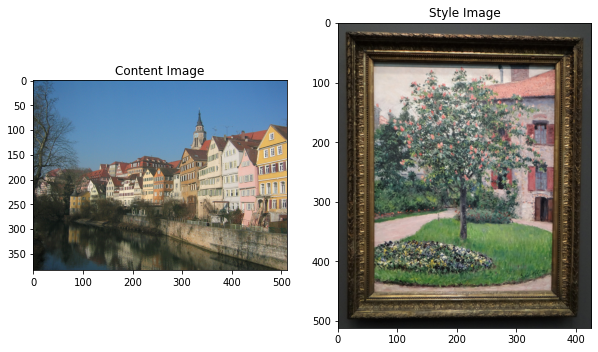

In [10]:
plt.figure(figsize=(10,10))

content = load_img(content_path).astype('uint8')
style = load_img(style_path).astype('uint8')

plt.subplot(1, 2, 1)
imshow(content, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style, "Style Image")
plt.show

## Prepare the data

Let's create methods that will allow us to load and preprocess our images easily. We perform the same preprocessing process as are expacted according to the VGG training process. VGG networks are trained on image with each channel normalized by `mean = [103.939, 116.779, 123.68]`and with channels BGR.

In [11]:
# def load_and_process_img(path_to_img):
#   img = load_img(path_to_img)
#   img = tf.keras.applications.vgg19.preprocess_input(img)
#   return img

def load_and_process_img(path_to_img):
  img = load_img(path_to_img)
  img = tf.keras.applications.vgg19.preprocess_input(img)
  return img

In order to view the outputs of our optimization, we are required to perform the inverse preprocessing step. Furthermore, since our optimized image may take its values anywhere between $- \infty$ and $\infty$, we must clip to maintain our values from within the 0-255 range.   

In [12]:
# def deprocess_img(processed_img):
#   x = processed_img.copy()
#   if len(x.shape) == 4:
#     x = np.squeeze(x, 0)
#   assert len(x.shape) == 3, ("input to deprocess image must be an image of"
#                              "dimension [1, height, width, channel] or [height, width, channel]")
#   if len(x.shape) != 3:
#     raise ValueError("Invalid input to deprocessing image")
  
#   # perform the inverse of the preprocessing step
#   x[:, :, 0] += 103.939
#   x[:, :, 1] += 116.779
#   x[:, :, 2] += 123.68
#   x = x[:, :, ::-1]

#   x = np.clip(x, 0, 255).astype('uint8')
#   return x

def deprocess_img(processed_img):
  x = processed_img.copy()
  if len(x.shape) == 4:
    x = np.squeeze(x, 0)
  assert len(x.shape) == 3, ("Input to deprocess image must be an image of "
                             "dimension [1, height, width, channel] or [height, width, channel]")
  if len(x.shape) != 3:
    raise ValueError("Invalid input to deprocessing image")
  
  # perform the inverse of the preprocessing step
  x[:, :, 0] += 103.939
  x[:, :, 1] += 116.779
  x[:, :, 2] += 123.68
  x = x[:, :, ::-1]

  x = np.clip(x, 0, 255).astype('uint8')
  return x

### Define content and style representations

In order to get both the content and style representations of our image, we will look at some intermediate layers within our model. As we go deeper into the model, these intermediate layers represent higher and higher order features. In this case, we are using the network architecture VGG19, a pretrained image classification network. These intermediate layers are necessary to define the representation of content and style from our images. For an input image, we will try to match the corresponding style and content target representations at these intermediate layers. 

#### Why intermediate layers?

You may be wondering why these intermediate outputs within our pretrained image classification network allow us to define style and content representations. At a high level, this phenomenon can be explained by the fact that in order for a network to perform image classification (which our network has been trained to do), it must understand the image. This involves taking the raw image as input pixels and building an internal representation through transformations that turn the raw image pixels into a complex understanding of the features present within the image. This is also partly why convolutional neural networks are able to generalize well: they’re able to capture the invariances and defining features within classes (e.g., cats vs. dogs) that are agnostic to background noise and other nuisances. Thus, somewhere between where the raw image is fed in and the classification label is output, the model serves as a complex feature extractor; hence by accessing intermediate layers, we’re able to describe the content and style of input images. 


Specifically we’ll pull out these intermediate layers from our network: 

In [13]:
# # Content layer where will pull our feature maps
# content_layers = ['block5_conv2']

# # Style layer we are interested in
# style_layers = ['block1_conv1',
#                 'block2_conv1',
#                 'block3_conv1',
#                 'block4_conv1',
#                 'block5_conv1'
#                 ]

# num_content_layers = len(content_layers)
# num_style_layers = len(style_layers)
# Content layer where will pull our feature maps
content_layers = ['block5_conv2'] 

# Style layer we are interested in
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1'
               ]

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

## Build the Model

In this case, we load [VGG19](https://keras.io/applications/#vgg19), and feed in our input tensor to the model. This will allow us to extract the feature maps (and subsequently the content and style representations) of the content, style, and generated images.

We use VGG19, as suggested in the paper. In addition, since VGG19 is a relatively simple model (compared with ResNet, Inception, etc) the feature maps actually work better for style transfer.

In order to access the intermediate layers corresponding to our style and content feature maps, we get the corresponding outputs and using the Keras [**Functional API**](https://keras.io/getting-started/functional-api-guide/), we define our model with the desired output activations.

With the Functional API defining a model simply involves defining the input and output:

`model = Model(inputs, outputs)`

In [14]:
# def get_model():
#   """Create our model with access to intermediate layers.

#   This function will load the VGG19 model and access the intermediate layers.
#   These layers will then be used to create a new model that will take input image and return the outputs from these intermediate layes from the VGG model.

#   Returns:
#     returns a keras model that takes image inputs and outputs the style and content intermediate layers.
#   """
#   # Load our model. We load pretrained VGG, trained on imagenet data
#   vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
#   vgg.trainable = False
#   # Get output layers corresponding to style and content layers
#   style_outputs = [vgg.get_layer(name).output for name in style_layers]
#   content_outputs = [vgg.get_layer(name).output for name in content_layers]
#   model_outputs = style_outputs + content_outputs
#   # Build model
#   return models.Model(vgg.input, model_outputs)

def get_model():
  """ Creates our model with access to intermediate layers. 
  
  This function will load the VGG19 model and access the intermediate layers. 
  These layers will then be used to create a new model that will take input image
  and return the outputs from these intermediate layers from the VGG model. 
  
  Returns:
    returns a keras model that takes image inputs and outputs the style and 
      content intermediate layers. 
  """
  # Load our model. We load pretrained VGG, trained on imagenet data
  vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  # Get output layers corresponding to style and content layers 
  style_outputs = [vgg.get_layer(name).output for name in style_layers]
  content_outputs = [vgg.get_layer(name).output for name in content_layers]
  model_outputs = style_outputs + content_outputs
  # Build model 
  return models.Model(vgg.input, model_outputs)

In the above code snippet, we'll load our pretrained image classification network. Then we grab the layers of interest as we defined earlier. Then we define a Model by setting the model's inputs to an image and the outputs to the outputs of the style and content layers. In other words, we created a model that will take an input image and output the content and style intermediate layers!

## Define and create our loss functions (content and style distances)

### Content Loss

Our content loss definition is actually quite simple. We’ll pass the network both the desired content image and our base input image. This will return the intermediate layer outputs (from the layers defined above) from our model. Then we simply take the euclidean distance between the two intermediate representations of those images.  

More formally, content loss is a function that describes the distance of content from our output image $x$ and our content image, $p$. Let $C_{nn}$ be a pre-trained deep convolutional neural network. Again, in this case we use [VGG19](https://keras.io/applications/#vgg19). Let $X$ be any image, then $C_{nn}(X)$ is the network fed by X. Let $F^l_{ij}(x) \in C_{nn}(x)$ and $P^l_{ij}(p) \in C_{nn}(p)$ describe the respective intermediate feature representation of the network with inputs $x$ and $p$ at layer $l$. Then we describe the content distance (loss) formally as: $$L^l_{content}(p, x) = \sum_{i, j} (F^l_{ij}(x) - P^l_{ij}(p))^2$$

We perform backpropagation in the usual way such that we minimize this content loss. We thus change the initial image until it generates a similar response in a certain layer (defined in content_layer) as the original content image.

This can be implemented quite simply. Again it will take as input the feature maps at a layer L in a network fed by x, our input image, and p, our content image, and return the content distance.



### Computing content loss

We will actually add our content losses at each desired layer. This way, each iteration when we feed our input image through the model(which in eager is simply `model(input_image)`!) all the content losses through the model will be properly compute and because we are executing eagerly, all the gradients will be computed.

In [15]:
def get_content_loss(base_content, target):
  return tf.reduce_mean(tf.square(base_content - target))

## Style Loss

Computing style loss is a bit more involved, but follows the same principle, this time feeding our network the base input image and the style image. However, instead of comparing the raw intermediate outputs of the base input image and the style image, we instead compare the Gram matrices of the two outputs. 

Mathematically, we describe the style loss of the base input image, $x$, and the style image, $a$, as the distance between the style representation (the gram matrices) of these images. We describe the style representation of an image as the correlation between different filter responses given by the Gram matrix  $G^l$, where $G^l_{ij}$ is the inner product between the vectorized feature map $i$ and $j$ in layer $l$. We can see that $G^l_{ij}$ generated over the feature map for a given image represents the correlation between feature maps $i$ and $j$. 

To generate a style for our base input image, we perform gradient descent from the content image to transform it into an image that matches the style representation of the original image. We do so by minimizing the mean squared distance between the feature correlation map of the style image and the input image. The contribution of each layer to the total style loss is described by
$$E_l = \frac{1}{4N_l^2M_l^2} \sum_{i,j}(G^l_{ij} - A^l_{ij})^2$$

where $G^l_{ij}$ and $A^l_{ij}$ are the respective style representation in layer $l$ of $x$ and $a$. $N_l$ describes the number of feature maps, each of size $M_l = height * width$. Thus, the total style loss across each layer is 
$$L_{style}(a, x) = \sum_{l \in L} w_l E_l$$
where we weight the contribution of each layer's loss by some factor $w_l$. In our case, we weight each layer equally ($w_l =\frac{1}{|L|}$)

### Computing style loss

Again, we implement our loss as a distance metric.

In [16]:
# def gram_matrix(input_tensor):
#   # We make the image channels first
#   channels = int(input_tensor.shape[-1])
#   a = tf.reshape(input_tensor, [-1, channels])
#   n = tf.shape(a)[0]
#   gram = tf.matmul(a, a, transpose_a=True)
#   return gram / tf.cast(n, tf.float32)

# def get_style_loss(base_style, gram_target):
#   """Expects two images of dimension h, w, c"""
#   # height, width, num filters of each layer
#   # We scale the loss at a given layer by the size of the feature map and the number of filters
#   height, width, channels = base_style.get_shape().as_list()
#   gram_style = gram_matrix(base_style)

#   return tf.reduce_mean(tf.square(gram_style - gram_target)) # / (4. *(channels ** 2) * (width * height) ** 2)

def gram_matrix(input_tensor):
  # We make the image channels first 
  channels = int(input_tensor.shape[-1])
  a = tf.reshape(input_tensor, [-1, channels])
  n = tf.shape(a)[0]
  gram = tf.matmul(a, a, transpose_a=True)
  return gram / tf.cast(n, tf.float32)

def get_style_loss(base_style, gram_target):
  """Expects two images of dimension h, w, c"""
  # height, width, num filters of each layer
  # We scale the loss at a given layer by the size of the feature map and the number of filters
  height, width, channels = base_style.get_shape().as_list()
  gram_style = gram_matrix(base_style)
  
  return tf.reduce_mean(tf.square(gram_style - gram_target))# / (4. * (channels ** 2) * (width * height) ** 2)

## Apply style transfer to our images

### Run Gradient Descent
If you aren't familiar with gradient descent/backpropagation or need a refresher, you should definitely check out this [awesome resource](https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent).

In this case, we use the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)* optimizer in order to minimize our loss. We iteratively update our output image such that it minimizes our loss: we don't update the weights associated with our network, but instead we train our input image to minimize loss. In order to do this, we must know how we calculate our loss and gradients. 

\* Note that L-BFGS, which if you are familiar with this algorithm is recommended, isn’t used in this tutorial because a primary motivation behind this tutorial was to illustrate best practices with eager execution, and, by using Adam, we can demonstrate the autograd/gradient tape functionality with custom training loops.


We'll define a little helper function that will load our content and style image, feed them forward through our network, which will then output the content and style feature representations from our model.

In [17]:
# def get_feature_representations(model, content_path, style_path):
#   """Helper function to compute our content and style feature representations.

#   This function will simply load and preprocess both the content and style images from their path. Then it will feed them through the network to obtain the outputs of the intermediate layers,

#   Arguments:
#     model: The model that we are using.
#     content_path: The path to the content image.
#     style_path: The path to the style image.

#   Returns:
#     returns the style features and the content features.
#   """
#   # Load our image in
#   content_image = load_and_process_img(content_path)
#   style_image = load_and_process_img(style_path)

#   # Batch compute content and style features
#   style_outputs = model(style_image)
#   content_outputs = model(content_image)

#   # Get the style and content feature representations from our model
#   style_features = [style_layer[0] for style_layer in  style_outputs[:num_style_layers]]
#   content_features = [content_layer[0] for content_layer in content_outputs[num_style_layers:]]
#   return style_features, content_features

def get_feature_representations(model, content_path, style_path):
  """Helper function to compute our content and style feature representations.

  This function will simply load and preprocess both the content and style 
  images from their path. Then it will feed them through the network to obtain
  the outputs of the intermediate layers. 
  
  Arguments:
    model: The model that we are using.
    content_path: The path to the content image.
    style_path: The path to the style image
    
  Returns:
    returns the style features and the content features. 
  """
  # Load our images in 
  content_image = load_and_process_img(content_path)
  style_image = load_and_process_img(style_path)
  
  # batch compute content and style features
  style_outputs = model(style_image)
  content_outputs = model(content_image)
  
  
  # Get the style and content feature representations from our model  
  style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
  content_features = [content_layer[0] for content_layer in content_outputs[num_style_layers:]]
  return style_features, content_features

### Computing the loss and gradients
Here we use [**tf.GradientTape**](https://www.tensorflow.org/programmers_guide/eager#computing_gradients) to compute the gradient. It allows us to take advantage of the automatic differentiation available by tracing operations for computing the gradient later. It records the operations during the forward pass and then is able to compute the gradient of our loss function with respect to our input image for the backwards pass.

In [18]:
# def compute_loss(model, loss_weights, init_image, gram_style_features, content_features):
#   """This function will compute the loss total loss.

#   Arguments:
#     model: The model that will give us access to the intermediate layers.
#     loss_weights: The weights of each contribution of each loss function.
#       (style weight, content weight, and total variation weight)
#     init_image: Our initial base image. This image is what we are updating with our optimization process. We apply the gradients wrt the loss we are calculating to this image.
#     gram_style_features: Precomputed gram matrices corresponding to the defined style layers of interest.
#     content_features: Precomputed outputs from defined content layers of interest.

#   Returns:
#     returns the total loss, style loss, content loss, and total variational loss
#   """
#   style_weight, content_weight = loss_weights

#   # Feed our init image through our model. This will give us the content and style representations at our desired layers. Since we're using eager our model is callable just like any other functions!
#   model_outputs = model(init_image)

#   style_output_features = model_outputs[:num_style_layers]
#   content_output_features = model_outputs[num_style_layers:]

#   style_score = 0
#   content_score = 0

#   # Accumulate style losses from all layers
#   # Here, we equally weight each contribution of each loss layer
#   weight_per_style_layer = 1.0 / float(num_style_layers)
#   for target_style, comb_style in zip(gram_style_features, style_output_features):
#     style_score += weight_per_style_layer * get_style_loss(comb_style[0], target_style)
  
#   # Accumulate content losses from all layers
#   weight_per_content_layer = 1.0 / float(num_content_layers)
#   for target_content, comb_content in zip(content_features, content_output_features):
#     content_score += weight_per_content_layer* get_content_loss(comb_content[0], target_content)

#   style_score *= style_weight
#   content_score *= content_weight

#   # Get total loss
#   loss = style_score + content_score
#   return loss, style_score, content_score

def compute_loss(model, loss_weights, init_image, gram_style_features, content_features):
  """This function will compute the loss total loss.
  
  Arguments:
    model: The model that will give us access to the intermediate layers
    loss_weights: The weights of each contribution of each loss function. 
      (style weight, content weight, and total variation weight)
    init_image: Our initial base image. This image is what we are updating with 
      our optimization process. We apply the gradients wrt the loss we are 
      calculating to this image.
    gram_style_features: Precomputed gram matrices corresponding to the 
      defined style layers of interest.
    content_features: Precomputed outputs from defined content layers of 
      interest.
      
  Returns:
    returns the total loss, style loss, content loss, and total variational loss
  """
  style_weight, content_weight = loss_weights
  
  # Feed our init image through our model. This will give us the content and 
  # style representations at our desired layers. Since we're using eager
  # our model is callable just like any other function!
  model_outputs = model(init_image)
  
  style_output_features = model_outputs[:num_style_layers]
  content_output_features = model_outputs[num_style_layers:]
  
  style_score = 0
  content_score = 0

  # Accumulate style losses from all layers
  # Here, we equally weight each contribution of each loss layer
  weight_per_style_layer = 1.0 / float(num_style_layers)
  for target_style, comb_style in zip(gram_style_features, style_output_features):
    style_score += weight_per_style_layer * get_style_loss(comb_style[0], target_style)
    
  # Accumulate content losses from all layers 
  weight_per_content_layer = 1.0 / float(num_content_layers)
  for target_content, comb_content in zip(content_features, content_output_features):
    content_score += weight_per_content_layer* get_content_loss(comb_content[0], target_content)
  
  style_score *= style_weight
  content_score *= content_weight

  # Get total loss
  loss = style_score + content_score 
  return loss, style_score, content_score

Then computing the gradients is easy:

In [19]:
# def compute_grads(cfg):
#   with tf.GradientTape() as tape:
#     all_loss = compute_loss(**cfg)
#   # Compute gradients wrt input image
#   total_loss = all_loss[0]
#   return tape.gradient(total_loss, cfg['init_image']), all_loss

def compute_grads(cfg):
  with tf.GradientTape() as tape: 
    all_loss = compute_loss(**cfg)
  # Compute gradients wrt input image
  total_loss = all_loss[0]
  return tape.gradient(total_loss, cfg['init_image']), all_loss

### Optimization loop

In [20]:
import IPython.display

def run_style_transfer(content_path,
                       style_path,
                       num_iterations=1000,
                       content_weight=1e3,
                       style_weight=1e-2):
  # We don't need to (or want to) train any layers of our model, so we set their trainable to false.
  model = get_model()
  for layer in model.layers:
    layer.trainable = False

  # Get the style and content feature representations (from our specified intermediate layers)
  style_features, content_features = get_feature_representations(model, content_path, style_path)
  gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]

  # Set initial image
  init_image = load_and_process_img(content_path)
  init_image = tf.Variable(init_image, dtype=tf.float32)

  # Create our optimizer
  opt = tf.train.AdamOptimizer(learning_rate=5, beta1=0.99, epsilon=1e-1)

  # For displaying intermediate images
  iter_count = 1

  # Store our best result
  best_loss, best_img = float('inf'), None

  # Create a nice config
  loss_weights = (style_weight, content_weight)
  cfg = {
      'model' : model,
      'loss_weights': loss_weights,
      'init_image': init_image,
      'gram_style_features': gram_style_features,
      'content_features': content_features
  }

  # For displaying
  num_rows = 2
  num_cols = 5
  display_interval = num_iterations/(num_rows*num_cols)
  start_time = time.time()
  global_start = time.time()

  norm_means = np.array([103.939, 116.779, 123.68])
  min_vals = -norm_means
  max_vals = 255 - norm_means

  imgs = []
  for i in range(num_iterations):
    grads, all_loss = compute_grads(cfg)
    loss, style_score, content_score = all_loss
    opt.apply_gradients([(grads, init_image)])
    clipped = tf.clip_by_value(init_image, min_vals, max_vals)
    init_image.assign(clipped)
    end_time = time.time()

    if loss < best_loss:
      # Update best loss and best image from total loss.
      best_loss = loss
      best_img = deprocess_img(init_image.numpy())

    if i % display_interval == 0:
      start_time = time.time()

      # Use the .numpy() method to get the concrete numpy array
      plot_img = init_image.numpy()
      plot_img = deprocess_img(plot_img)
      imgs.append(plot_img)
      IPython.display.clear_output(wait=True)
      IPython.display.display_png(Image.fromarray(plot_img))
      print('Iteration : {}'.format(i))
      print('Total loss: {:.4e}, '
            'style loss: {:.4e}, '
            'content loss: {:.4e}, '
            'time: {:.4f}s'.format(loss, style_score, content_score, time.time() - start_time))
  print('Total time: {:.4f}s'.format(time.time() - global_start))
  IPython.display.clear_output(wait=True)
  plt.figure(figsize=(14,4))
  for i,img in enumerate(imgs):
    plt.subplot(num_rows, num_cols,i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

  return best_img, best_loss

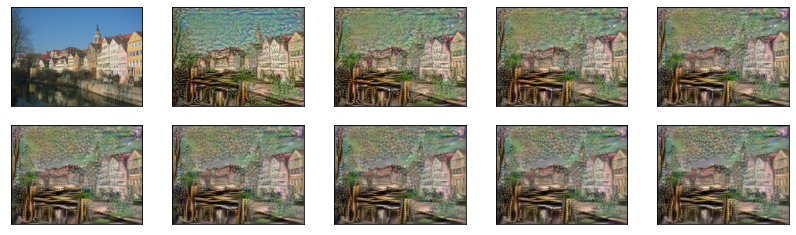

In [21]:
best, best_loss = run_style_transfer(content_path,
                                     style_path, num_iterations=1000)

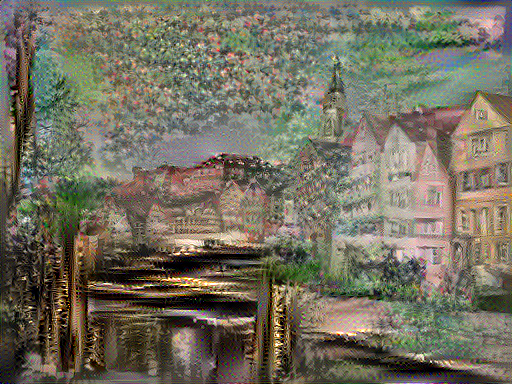

In [22]:
Image.fromarray(best)

## Visualize outputs
We "deprocess" the output image in order to remove the processing that was applied to it. 

In [23]:
def show_results(best_img, content_path, style_path, show_large_final=True):
  plt.figure(figsize=(10, 5))
  content = load_img(content_path)
  style = load_img(style_path)

  plt.subplot(1, 2, 1)
  imshow(content, 'Content Image')

  plt.subplot(1, 2, 2)
  imshow(style, 'Style Image')

  if show_large_final:
    plt.figure(figsize=(10, 10))

    plt.imshow(best_img)
    plt.title('Output Image')
    plt.show()

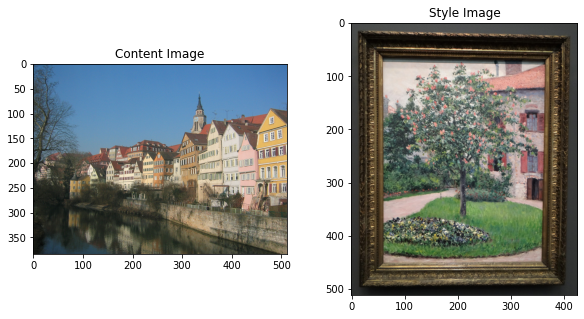

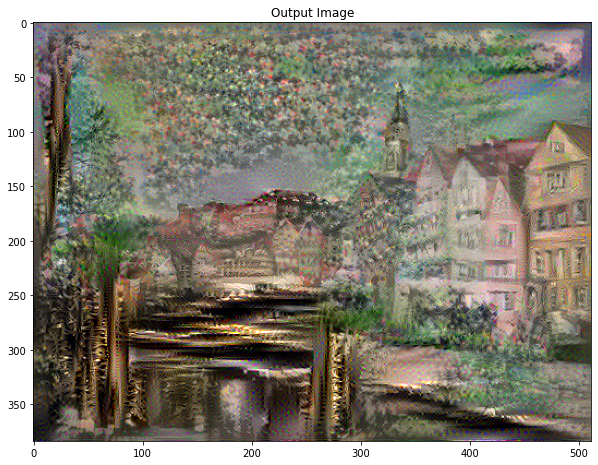

In [24]:
show_results(best, content_path, style_path)

## Try it on other images


### Starry night + Tower of Effel

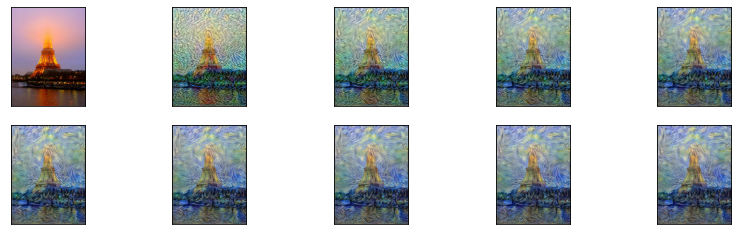

In [25]:
best_starry_night, best_loss = run_style_transfer('/tmp/nst/Effel_Tower_smogy_january_evening.jpg',
                                                  '/tmp/nst/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

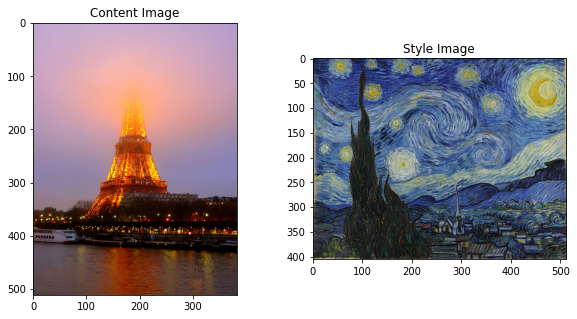

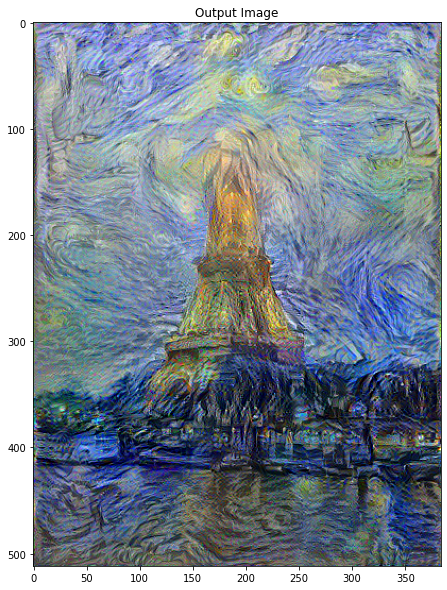

In [26]:
show_results(best_starry_night, '/tmp/nst/Effel_Tower_smogy_january_evening.jpg',
                                '/tmp/nst/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

### Universe + Tower of Effel

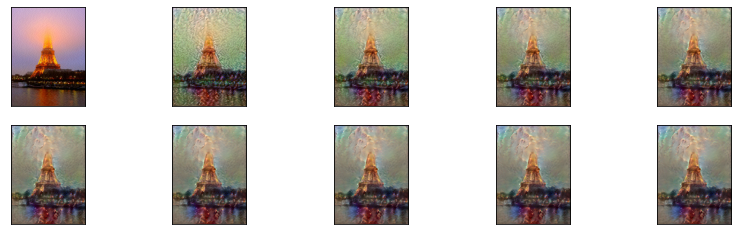

In [27]:
best_universe, best_loss = run_style_transfer('/tmp/nst/Effel_Tower_smogy_january_evening.jpg',
                                              '/tmp/nst/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg')

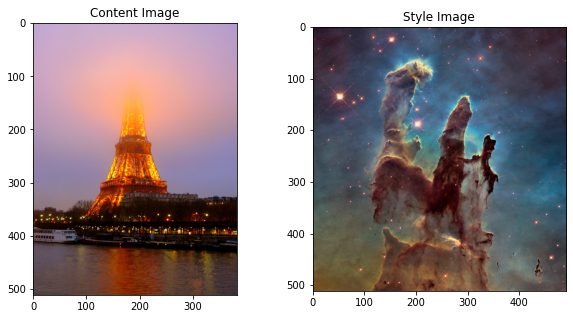

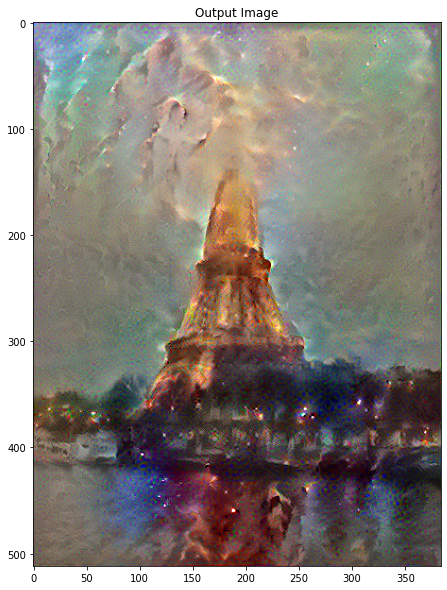

In [28]:
show_results(best_universe, '/tmp/nst/Effel_Tower_smogy_january_evening.jpg',
                            '/tmp/nst/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg')

### Universe + Westminster palace

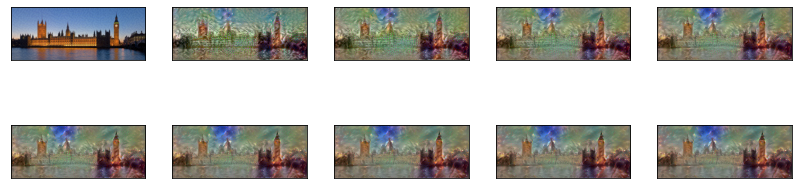

In [33]:
best_Universe, best_loss = run_style_transfer('/tmp/nst/Palace_of_Westminster,_London_-_Feb_2007.jpg',
                                              '/tmp/nst/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg')

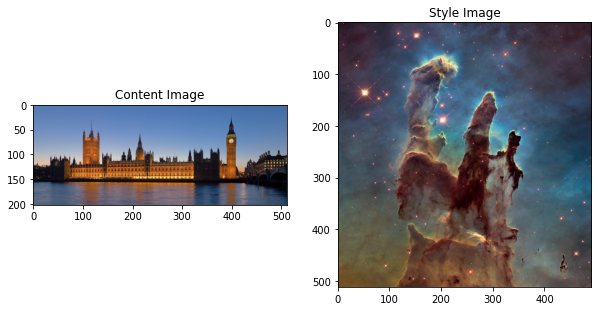

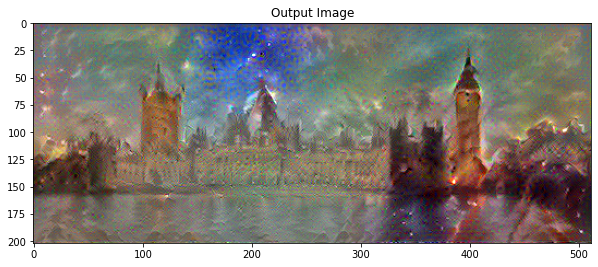

In [34]:
show_results(best_Universe, '/tmp/nst/Palace_of_Westminster,_London_-_Feb_2007.jpg',
                            '/tmp/nst/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg')